In [1]:
import numpy as np
import pandas as pd
import os
import decimal
from math import *
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
#Import
cwd = os.getcwd()
path = cwd.replace('FinalProject/preprocessing/exploration','FinalProject/preprocessing/cleaning/cleaned')
df = pd.read_csv(path)
df

Age  Flight Distance  Inflight wifi service  \
0       0.576923         0.026050                      5   
1       0.371795         0.571890                      1   
2       0.166667         0.032512                      2   
3       0.474359         0.675687                      0   
4       0.538462         0.232431                      2   
...          ...              ...                    ...   
129482  0.205128         0.032512                      2   
129483  0.538462         0.467690                      4   
129484  0.294872         0.396607                      1   
129485  0.192308         0.195679                      1   
129486  0.256410         0.341680                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       1                       3   
2                                       0                       2   
3                                       0                       0   
4                                       3                       4   
...                                   ...                     ...   
129482                                  1                       2   
129483                                  4                       4   
129484                                  1                       1   
129485                                  1                       1   
129486                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   4               3                4             3   
1                   1               5                4             5   
2                   4               2                2             2   
3                   2               3                4             4   
4                   3               4                1             2   
...               ...             ...              ...           ...   
129482              3               2                2             2   
129483              4               2                4             5   
129484              3               4                1             5   
129485              5               1                1             1   
129486              3               1                1             1   

        Inflight entertainment  ...  Male  Female  Loyal  Disloyal  \
0                            5  ...   0.0     1.0    1.0       0.0   
1                            4  ...   0.0     1.0    1.0       0.0   
2                            2  ...   1.0     0.0    0.0       1.0   
3                            1  ...   1.0     0.0    1.0       0.0   
4                            2  ...   0.0     1.0    1.0       0.0   
...                        ...  ...   ...     ...    ...       ...   
129482                       2  ...   0.0     1.0    0.0       1.0   
129483                       5  ...   1.0     0.0    1.0       0.0   
129484                       4  ...   1.0     0.0    0.0       1.0   
129485                       1  ...   0.0     1.0    0.0       1.0   
129486                       1  ...   1.0     0.0    1.0       0.0   

        Personal Travel  Business Travel  Economy Class  Economy Plus Class  \
0                   0.0              1.0            1.0                 0.0   
1                   0.0              1.0            0.0                 0.0   
2                   0.0              1.0            1.0                 0.0   
3                   0.0              1.0            0.0                 0.0   
4                   0.0              1.0            1.0                 0.0   
...                 ...              ...            ...                 ...   
129482              0.0              1.0            1.0                 0.0   
129483              0.0              1.0            0.0                 0.0   
129484              0.0              1.0      

In [11]:
df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Male', 'Female', 'Loyal', 'Disloyal',
       'Personal Travel', 'Business Travel', 'Economy Class',
       'Economy Plus Class', 'Business Class', 'id'],
      dtype='object')

In [12]:
#Prediction column
df['satisfaction'].unique()

array([1, 0])

In [63]:
contin = []
print('Continuous Data')

def conditioning_cont(df, column):
    c = len(df[(df[column] <= 1) & (df[column] > -1) & (df[column] != 0)])
    if c == 0:
        return False
    else:
        return True
    
for c in df.columns:
    restricted = ['id']
    if conditioning_cont(df, c) == True and c not in restricted:
        contin.append(c)
        print(f'Column: {c}')

Continuous Data
Column: Age
Column: Flight Distance
Column: Departure Delay in Minutes
Column: Arrival Delay in Minutes


In [71]:
df['Flight Distance'].max() == 5

False

In [74]:
categ = []
print('Categorical Data')

def conditioning_categ(df, column):
    binary = [0, 1]
    c = df[column].max() == 5
    if c == True:
        return True
    else:
        return False
    
for c in df.columns:
    restricted = ['id']
    if conditioning_categ(df, c) == True and c not in restricted:
        categ.append(c)
        print(f'Column: {c}')

Categorical Data
Column: Inflight wifi service
Column: Departure/Arrival time convenient
Column: Ease of Online booking
Column: Gate location
Column: Food and drink
Column: Online boarding
Column: Seat comfort
Column: Inflight entertainment
Column: On-board service
Column: Leg room service
Column: Baggage handling
Column: Checkin service
Column: Inflight service
Column: Cleanliness


## Data Exploration

### Univariate Analysis
For continuous variables, develop boxplots and/or histograms independently

For the categorical variables, develop bar charts to identify frequencies

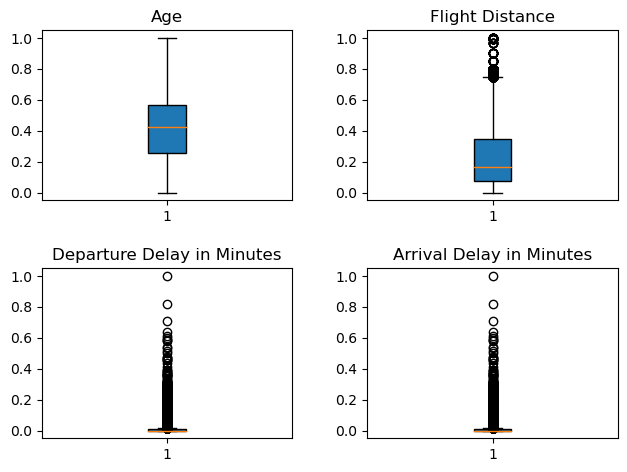

In [39]:

data0 = df[contin[0]].to_numpy()

fig, ax = plt.subplots(2, 2)
ax[0, 0].boxplot(data0,vert=True,patch_artist=True); 
ax[0, 0].set_title('Age')

data1 = df[contin[1]].to_numpy()

ax[0, 1].boxplot(data1,vert=True,patch_artist=True); 
ax[0, 1].set_title('Flight Distance')

data2 = df[contin[2]].to_numpy()

ax[1, 0].boxplot(data2,vert=True,patch_artist=True); 
ax[1, 0].set_title('Departure Delay in Minutes')

data3 = df[contin[3]].to_numpy()

ax[1, 1].boxplot(data2,vert=True,patch_artist=True); 
ax[1, 1].set_title('Arrival Delay in Minutes')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)


plt.show()

In [53]:
# How much data points are greater than the mean
print('Departure Delay greather than its mean: ',len(df[df['Departure Delay in Minutes'] > df['Departure Delay in Minutes'].mean()]))
print('Arrival Delay greather than its mean: ',len(df[df['Arrival Delay in Minutes'] > df['Arrival Delay in Minutes'].mean()]))

Departure Delay greather than its mean:  29666
Arrival Delay greather than its mean:  29558


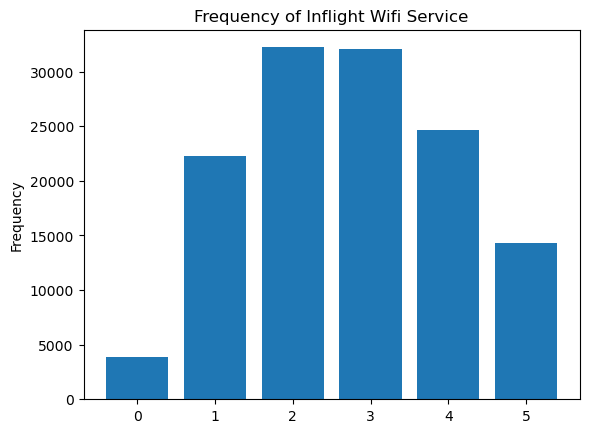

In [88]:
#Inflight wifi service
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = [len(df[df['Inflight wifi service'] == 0]), 
        len(df[df['Inflight wifi service'] == 1]),
       len(df[df['Inflight wifi service'] == 2]),
       len(df[df['Inflight wifi service'] == 3]),
       len(df[df['Inflight wifi service'] == 4]),
       len(df[df['Inflight wifi service'] == 5])]

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Inflight Wifi Service')
plt.show()

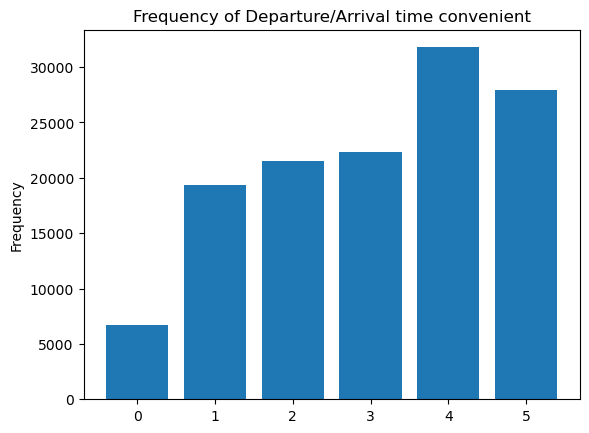

In [89]:
#Departure/Arrival time convenient
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Departure/Arrival time convenient'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Departure/Arrival time convenient')
plt.show()

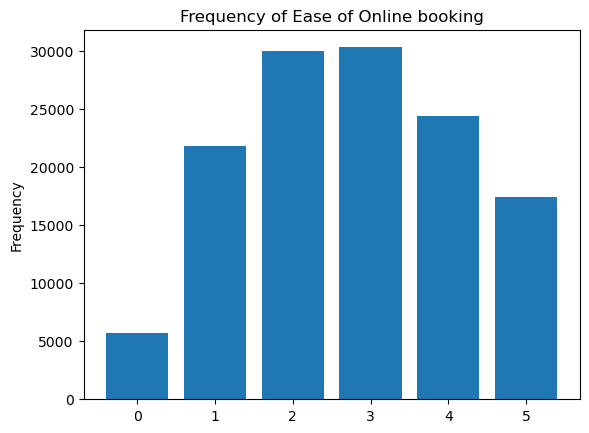

In [90]:
#Ease of Online booking
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Ease of Online booking'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Ease of Online booking')
plt.show()

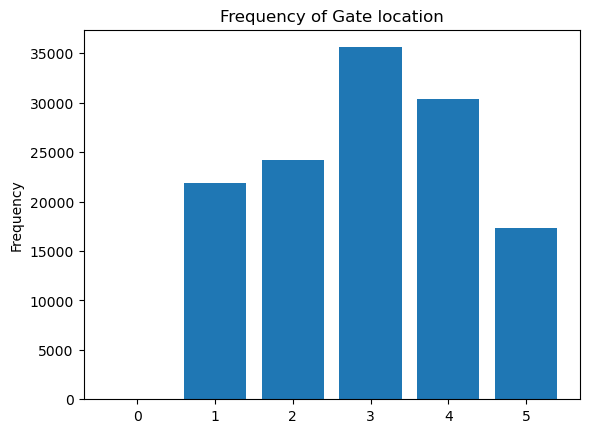

In [92]:
#Gate location
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Gate location'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Gate location')
plt.show()

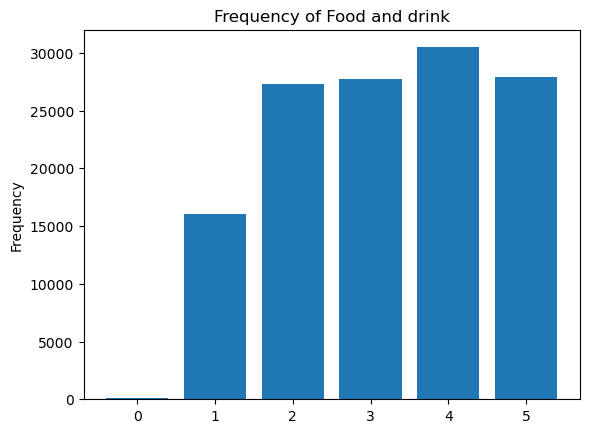

In [93]:
#Food and drink
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Food and drink'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Food and drink')
plt.show()

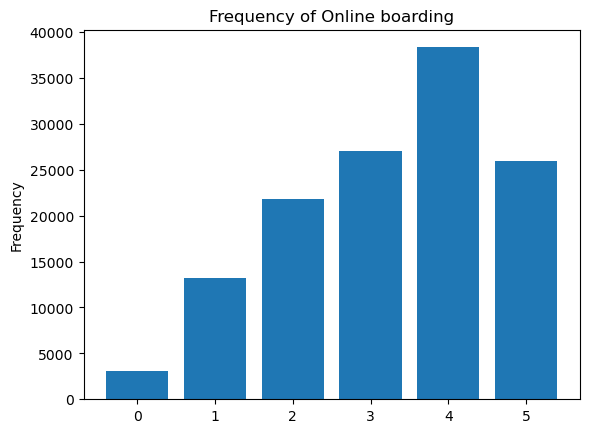

In [94]:
#Online boarding
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Online boarding'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Online boarding')
plt.show()

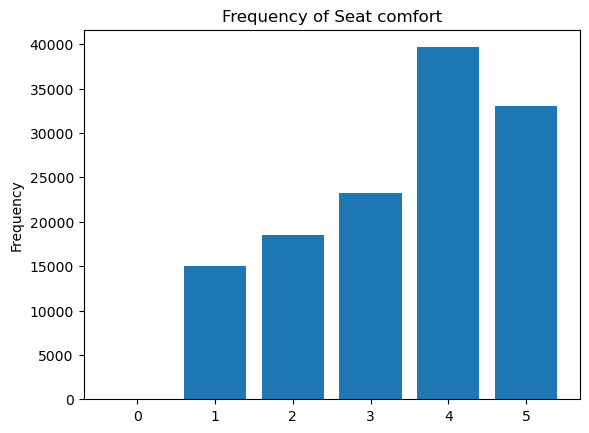

In [95]:
#Seat comfort
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Seat comfort'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Seat comfort')
plt.show()

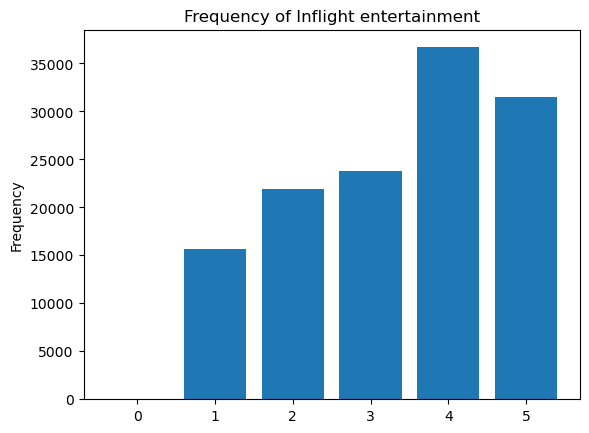

In [96]:
#Inflight entertainment
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Inflight entertainment'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Inflight entertainment')
plt.show()

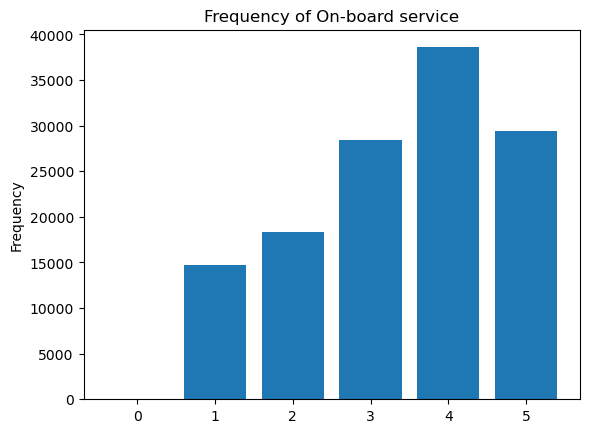

In [97]:
#On-board service
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['On-board service'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of On-board service')
plt.show()

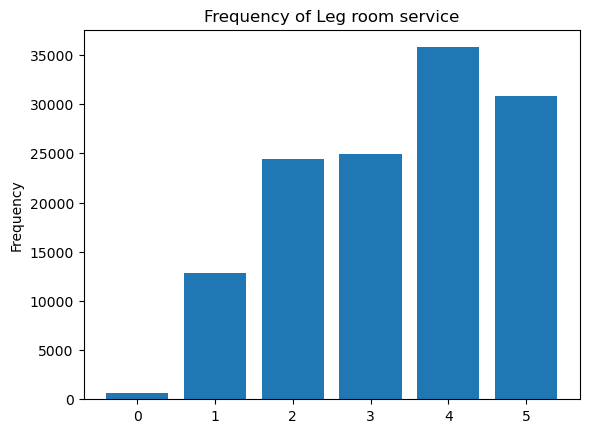

In [98]:
#Leg room service
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Leg room service'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Leg room service')
plt.show()

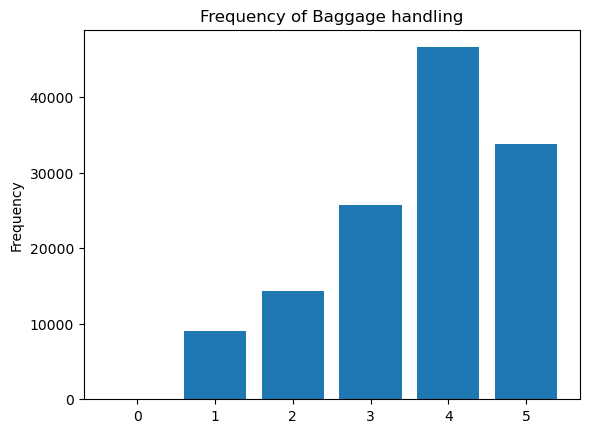

In [99]:
#Baggage handling
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Baggage handling'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Baggage handling')
plt.show()

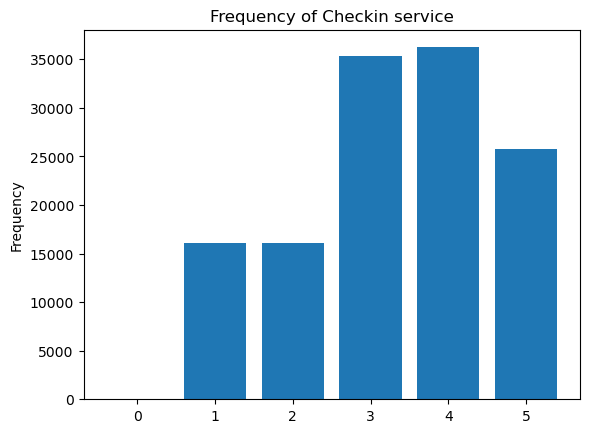

In [100]:
#Checkin service
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Checkin service'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Checkin service')
plt.show()

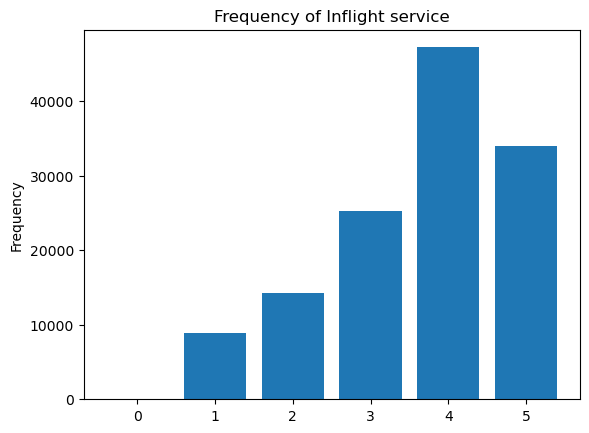

In [101]:
#Inflight service
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Inflight service'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Inflight service')
plt.show()

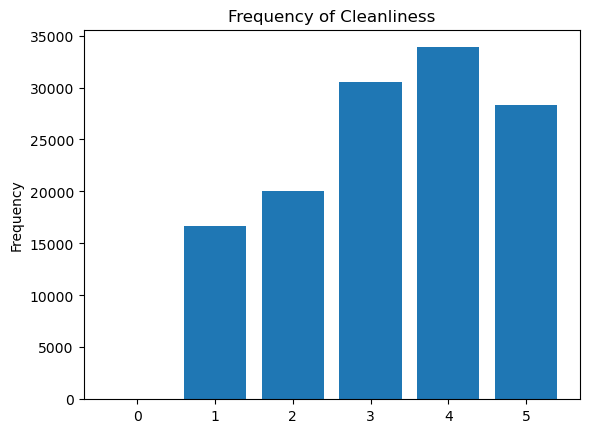

In [102]:
#Cleanliness
fig, ax = plt.subplots()
ratings = [0, 1, 2, 3, 4, 5]
data = []
for i in ratings:
    l = len(df[df['Cleanliness'] == i])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Cleanliness')
plt.show()

In [106]:
#Encoded Features
restricted = ['id','satisfaction']
enc = []
print('Encoded Features')
for i in df.columns:
    if i not in categ and i not in contin and i not in restricted:
        enc.append(i)
        print(i)

Encoded Features
Male
Female
Loyal
Disloyal
Personal Travel
Business Travel
Economy Class
Economy Plus Class
Business Class


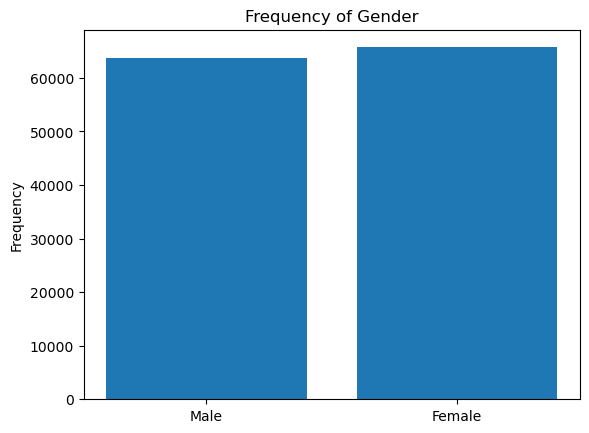

In [107]:
#Gender
fig, ax = plt.subplots()
ratings = ['Male', 'Female']
data = []
for i in ratings:
    l = len(df[df[i] == 1])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Gender')
plt.show()

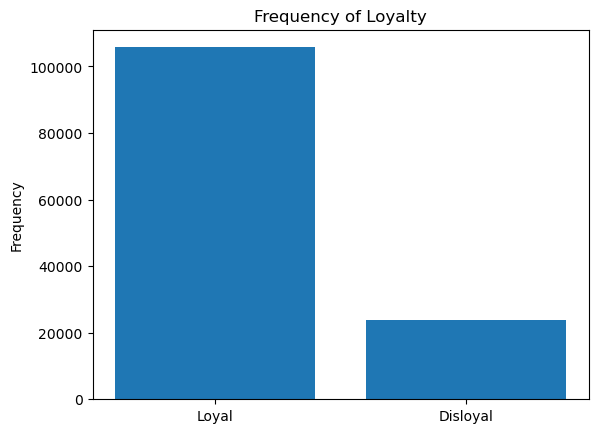

In [108]:
#Loyalty
fig, ax = plt.subplots()
ratings = ['Loyal', 'Disloyal']
data = []
for i in ratings:
    l = len(df[df[i] == 1])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Loyalty')
plt.show()

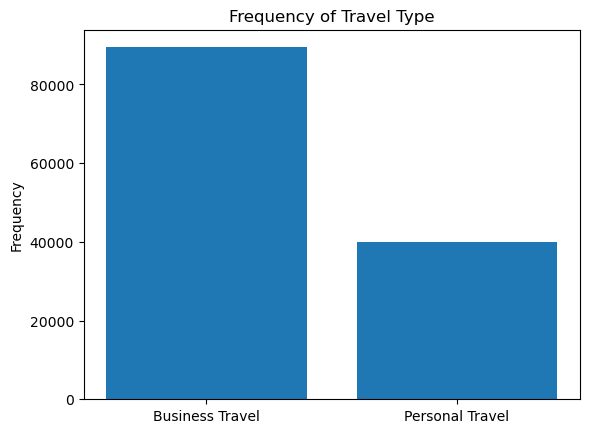

In [110]:
#Travel Type
fig, ax = plt.subplots()
ratings = ['Business Travel', 'Personal Travel']
data = []
for i in ratings:
    l = len(df[df[i] == 1])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Travel Type')
plt.show()

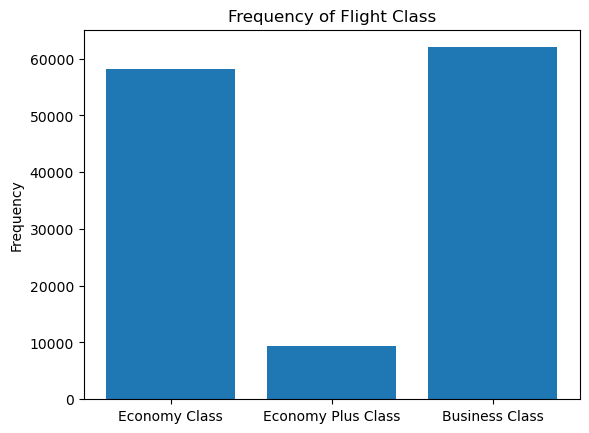

In [111]:
#Flight Class
fig, ax = plt.subplots()
ratings = ['Economy Class', 'Economy Plus Class', 'Business Class']
data = []
for i in ratings:
    l = len(df[df[i] == 1])
    data.append(l)

legends = ratings

ax.bar(ratings, data, label = legends)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Flight Class')
plt.show()

## Bivariate Analysis
For continuous variables, develop scatterplots and lineplots between the continuous variable in relation to the “satisfaction” variable.

Develop grouped column charts between categorical variables and the “satisfaction” variable

Develop grouped column charts between nominal variables and the “satisfaction” variable